In [ ]:
# !pip install yfinance
# !pip install ta

In [ ]:
import yfinance as yf


In [ ]:
def get_stock_data(symbol, start_date, end_date, interval):
    data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return data

# Example usage
symbol = "TCS"  # Symbol for Nifty 50
start_date = "2020-01-01"
end_date = "2023-06-01"
interval = "1d"  # Use "5m" for 5 minutes, "1h" for 1 hour, "4h" for 4 hours, and "1d" for 1 day

stockData = get_stock_data(symbol, start_date, end_date, interval)
print(stockData.head())


[*********************100%***********************]  1 of 1 completed
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2020-01-02  4.29  4.37  4.17   4.27   3.991522  142800
2020-01-03  4.22  4.32  4.18   4.28   4.000870  141500
2020-01-06  4.23  4.46  4.20   4.45   4.159782  118500
2020-01-07  4.44  4.45  4.31   4.39   4.103695  104500
2020-01-08  4.36  4.45  4.33   4.34   4.056957  213400


In [ ]:
stockData


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,4.29,4.37,4.17,4.27,3.991522,142800
2020-01-03,4.22,4.32,4.18,4.28,4.000870,141500
2020-01-06,4.23,4.46,4.20,4.45,4.159782,118500
2020-01-07,4.44,4.45,4.31,4.39,4.103695,104500
2020-01-08,4.36,4.45,4.33,4.34,4.056957,213400
...,...,...,...,...,...,...
2023-05-24,2.41,2.44,2.28,2.40,2.400000,762400
2023-05-25,2.35,2.38,2.25,2.28,2.280000,509500
2023-05-26,2.28,2.38,2.23,2.35,2.350000,437600


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Splitting the data into training and testing sets
train_data, test_data = train_test_split(stockData, test_size=0.2, shuffle=False)

# Displaying the dimensions of the split datasets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (687, 6)
Testing data shape: (172, 6)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

window_size = 10
num_features = 1

# Preprocessing the data for the LSTM model
def preprocess_data(data):
    X, y = [], []
    for i in range(len(data) - window_size):
        window_data = data[i : i + window_size]  # Extracting the window of data
        X.append(window_data)
        y.append(data[i + window_size])  # Predicting the next data point
    return np.array(X), np.array(y)

# Preprocessing the training data
train_data = train_data['Close'].values  # Assuming the closing price is in a column named 'Close'
X_train, y_train = preprocess_data(train_data)

# Preprocessing the testing data
test_data = test_data['Close'].values  # Assuming the closing price is in a column named 'Close'
X_test, y_test = preprocess_data(test_data)

# Reshaping the input data to match the LSTM model's input shape
X_train = np.reshape(X_train, (X_train.shape[0], window_size, num_features))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, num_features))

# Designing the deep learning model
model = Sequential()
model.add(LSTM(units=64, input_shape=(window_size, num_features)))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Displaying the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:


# Preparing the input sequences for the LSTM model
def prepare_input_sequences(X):
    sequences = []
    for i in range(len(X)):
        sequence = X[i]
        sequences.append(sequence)
    return np.array(sequences)

# Preparing the input sequences for training and testing data
X_train_sequences = prepare_input_sequences(X_train)
X_test_sequences = prepare_input_sequences(X_test)

# Displaying the shapes of the input sequences
print("X_train_sequences shape:", X_train_sequences.shape)
print("X_test_sequences shape:", X_test_sequences.shape)


X_train_sequences shape: (677, 10, 1)
X_test_sequences shape: (162, 10, 1)


In [ ]:


# Training the LSTM model
history = model.fit(X_train_sequences, y_train, epochs=10, batch_size=32, validation_data=(X_test_sequences, y_test))

# Evaluating the model on the testing data
loss = model.evaluate(X_test_sequences, y_test)
print("Test Loss:", loss)


Epoch 1/10
22/22 [==============================] - 4s 36ms/step - loss: 63.2999 - val_loss: 0.6468
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 26.5608 - val_loss: 7.9758
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 11.4119 - val_loss: 0.1747
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 5.4972 - val_loss: 0.0954
Epoch 5/10
22/22 [==============================] - 0s 9ms/step - loss: 3.3375 - val_loss: 0.1039
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 2.2522 - val_loss: 0.0773
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 1.5763 - val_loss: 0.1752
Epoch 8/10
22/22 [==============================] - 0s 9ms/step - loss: 1.2822 - val_loss: 0.1389
Epoch 9/10
22/22 [==============================] - 0s 8ms/step - loss: 0.9851 - val_loss: 0.0729
Epoch 10/10
6/6 [==============================] - 0s 4ms/step - loss: 0.1744
Test Loss: 0.17444422841072083


6/6 [==============================] - 0s 3ms/step


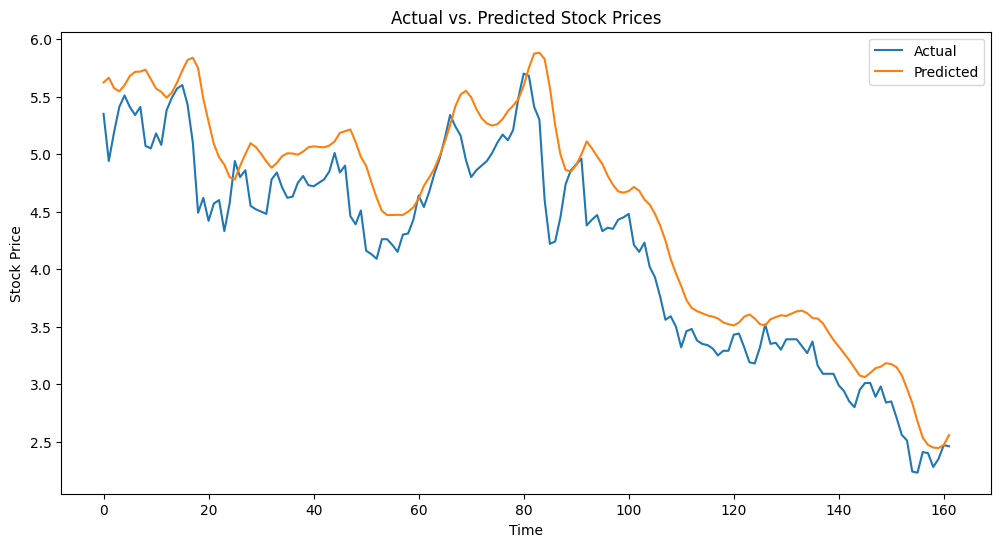

Mean Squared Error (MSE): 0.17444421856461118
Root Mean Squared Error (RMSE): 0.4176651991303695
Mean Absolute Error (MAE): 0.34063175283832314


In [ ]:
import matplotlib.pyplot as plt


# Making predictions with the LSTM model
y_pred = model.predict(X_test_sequences)

# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

# Calculating evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Epoch 1/10
22/22 [==============================] - 0s 10ms/step - loss: 0.6722 - val_loss: 0.0601
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 0.5928 - val_loss: 0.0631
Epoch 3/10
22/22 [==============================] - 0s 9ms/step - loss: 0.5171 - val_loss: 0.0642
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 0.4562 - val_loss: 0.0553
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 0.3834 - val_loss: 0.0559
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 0.3567 - val_loss: 0.0724
Epoch 7/10
22/22 [==============================] - 0s 8ms/step - loss: 0.3355 - val_loss: 0.0645
Epoch 8/10
22/22 [==============================] - 0s 8ms/step - loss: 0.3116 - val_loss: 0.0565
Epoch 9/10
22/22 [==============================] - 0s 9ms/step - loss: 0.2988 - val_loss: 0.0727
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1078
Test Loss: 0.10779804736375809


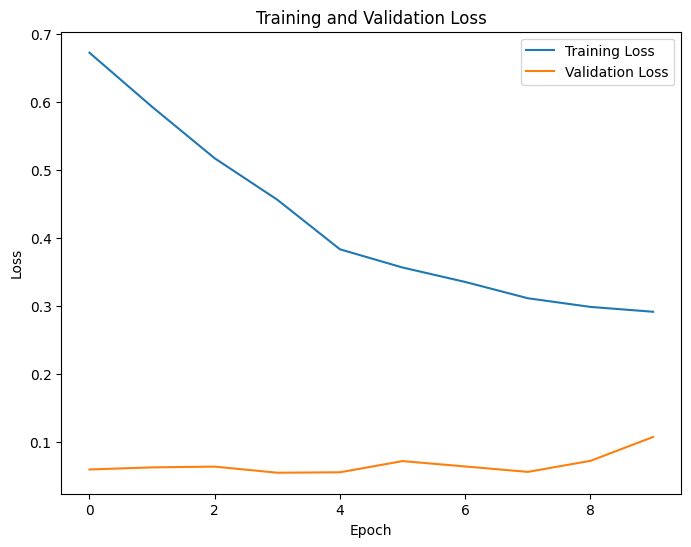

In [ ]:

# Training the LSTM model with fine-tuning
history = model.fit(X_train_sequences, y_train, epochs=10, batch_size=32, validation_data=(X_test_sequences, y_test))

# Evaluating the model on the testing data
loss = model.evaluate(X_test_sequences, y_test)
print("Test Loss:", loss)

# Plotting the training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Making predictions with the LSTM model
y_pred = model.predict(X_test_sequences)

# Reshaping the predicted values to match the original shape
y_pred = y_pred.reshape(-1)

# Displaying the actual and predicted stock prices
for i in range(len(y_test)):
    print("Actual:", y_test[i], "\tPredicted:", y_pred[i])


6/6 [==============================] - 0s 3ms/step
Actual: 5.349999904632568 	Predicted: 5.630977
Actual: 4.940000057220459 	Predicted: 5.647121
Actual: 5.190000057220459 	Predicted: 5.4712644
Actual: 5.409999847412109 	Predicted: 5.3843064
Actual: 5.510000228881836 	Predicted: 5.4512115
Actual: 5.409999847412109 	Predicted: 5.604305
Actual: 5.340000152587891 	Predicted: 5.6972237
Actual: 5.409999847412109 	Predicted: 5.695987
Actual: 5.070000171661377 	Predicted: 5.6777425
Actual: 5.050000190734863 	Predicted: 5.5291505
Actual: 5.179999828338623 	Predicted: 5.374518
Actual: 5.079999923706055 	Predicted: 5.3327856
Actual: 5.380000114440918 	Predicted: 5.3282924
Actual: 5.489999771118164 	Predicted: 5.447991
Actual: 5.570000171661377 	Predicted: 5.6156597
Actual: 5.599999904632568 	Predicted: 5.7711062
Actual: 5.429999828338623 	Predicted: 5.86958
Actual: 5.099999904632568 	Predicted: 5.831531
Actual: 4.489999771118164 	Predicted: 5.610347
Actual: 4.619999885559082 	Predicted: 5.186865
